# **Task 4**

## **DJS Synapse Learning Period**
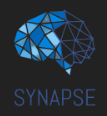

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Task 4/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [92]:
import re

titlename = []
for i in range(len(df['Name'])):
  name = df['Name'][i]
  title_search = re.search('(\w+)\.', name)
  if title_search:
    title = title_search.group(1)
    titlename.append(title)

df['Title'] = titlename
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [93]:
df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [94]:
df.isna().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64

In [95]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [96]:
df.isna().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
Title        0.000000
dtype: float64

*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [97]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isna().sum()/len(df)*100


Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
Title       0.0
dtype: float64

### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [98]:
df['Family_members'] = df['SibSp'] + df['Parch']
df



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,Mr,1
1,1,1,female,38.000000,1,0,71.2833,C,Mrs,1
2,1,3,female,26.000000,0,0,7.9250,S,Miss,0
3,1,1,female,35.000000,1,0,53.1000,S,Mrs,1
4,0,3,male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev,0
887,1,1,female,19.000000,0,0,30.0000,S,Miss,0
888,0,3,female,29.699118,1,2,23.4500,S,Miss,3
889,1,1,male,26.000000,0,0,30.0000,C,Mr,0


In [99]:
X=df[['Age', 'Fare', 'Family_members']]
X=X.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
df[['Age', 'Fare', 'Family_members']]=X
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Rev,0.0
887,1,1,female,0.233476,0,0,0.058556,S,Miss,0.0
888,0,3,female,0.367921,1,2,0.045771,S,Miss,0.3
889,1,1,male,0.321438,0,0,0.058556,C,Mr,0.0


In [100]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
df=pd.get_dummies(df, columns=['Pclass','Sex','Title','Embarked'])
df

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,1,0.472229,1,0,0.139136,0.1,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,1,0.321438,0,0,0.015469,0.0,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,1,0.434531,1,0,0.103644,0.1,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0,0.434531,0,0,0.015713,0.0,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
887,1,0.233476,0,0,0.058556,0.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
888,0,0.367921,1,2,0.045771,0.3,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
889,1,0.321438,0,0,0.058556,0.0,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [101]:
#write code here
y_label=df['Survived']
y_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [102]:
df.drop(['Survived'], axis=1, inplace=True)
df


,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
1,0.472229,1,0,0.139136,0.1,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0.321438,0,0,0.015469,0.0,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.434531,1,0,0.103644,0.1,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,0.434531,0,0,0.015713,0.0,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.0,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
887,0.233476,0,0,0.058556,0.0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
888,0.367921,1,2,0.045771,0.3,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
889,0.321438,0,0,0.058556,0.0,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_label, test_size=0.3,)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 30)
(268, 30)
(623,)
(268,)


<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [105]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,y_train)
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

0.9823434991974318
0.7798507462686567


<b>Print the Model Accuracy</b>

In [106]:
y_pred = dt_model.predict_proba(X_test)[:,1]

new_y = []
for i in range(len(y_pred)):
  if y_pred[i]<0.6:
    new_y.append(0)
  else:
    new_y.append(1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, new_y)


0.7798507462686567

## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [107]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy=[]
test_accuracy=[]

for i in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=i, random_state=10)
  dt_model.fit(X_train,y_train)
  train_accuracy.append(dt_model.score(X_train,y_train))
  test_accuracy.append(dt_model.score(X_test,y_test))

frame=pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_accuracy, 'test_acc': test_accuracy})


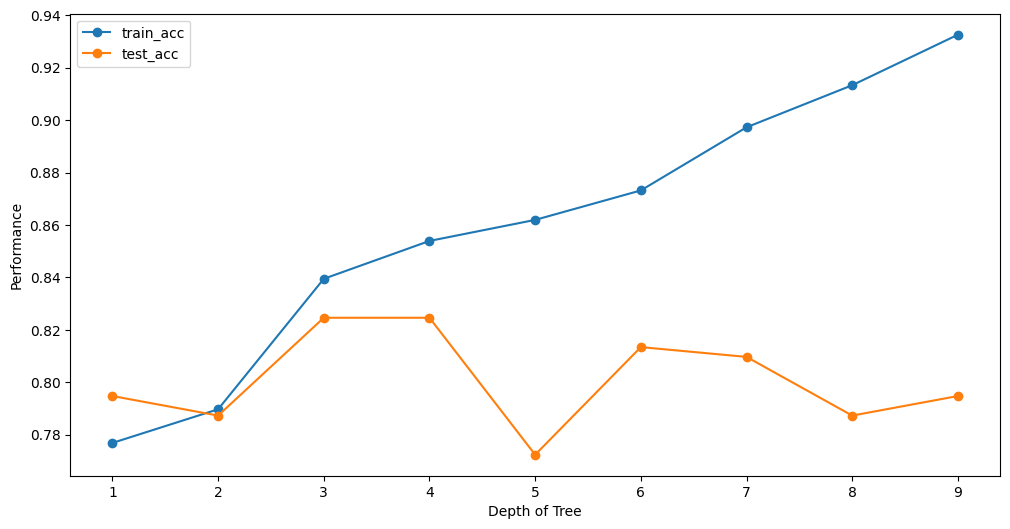

In [108]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train_acc', 'test_acc'])

In [109]:
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=10)

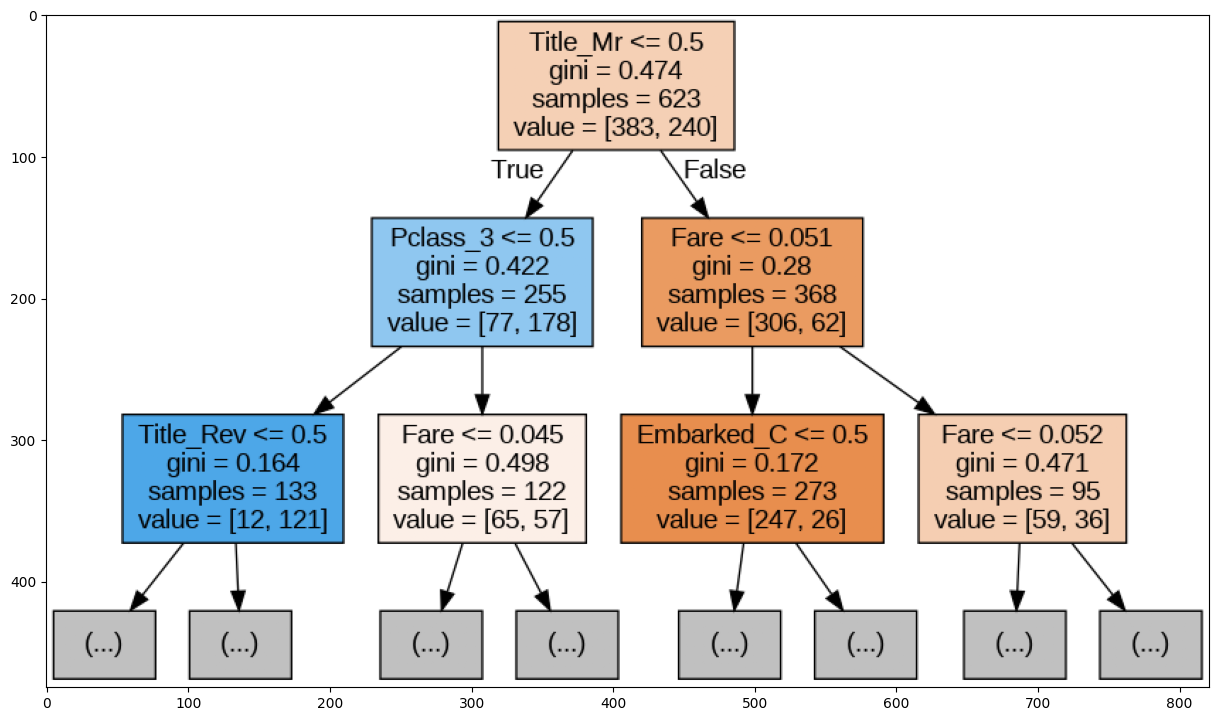

In [110]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [111]:
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))


0.8619582664526485
0.7761194029850746


## Explain: What is your understanding of the charts you made above?

Ans:

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [112]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print(accuracy)


0.8246268656716418


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [118]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [120]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 17}

In [121]:
print(rf_grid.score(X_train,y_train))
print(rf_grid.score(X_test,y_test))

0.8154093097913323
0.835820895522388


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:

## Extra - BaggingClassifier

In [124]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(dt_model, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
bc = bc.fit(X_train, y_train)
print(bc.score(X_train,y_train))
print(bc.score(X_test,y_test))

0.8571428571428571
0.8432835820895522


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [126]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

print(np.mean(cross_val_score(abc,X_train,y_train,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(abc,X_test,y_test,scoring='accuracy',cv=10)))

0.8105222734254992
0.7943019943019942


## Explain: What is the difference between Bagging and Boosting?

Ans:

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [127]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train,y_train)["ccp_alphas"]
ccp_grid_alpha_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=10),
    scoring = make_scorer(accuracy_score),
    param_grid = ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}),
)
ccp_grid_alpha_search.fit(X_train,y_train)



GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7d0a495da0b0>,
             scoring=make_scorer(accuracy_score))

In [128]:
ccp_grid_alpha_search.best_params_

{'ccp_alpha': 0.010958000847802431}

In [130]:
best_ccp_alpha_tree = ccp_grid_alpha_search.best_estimator_

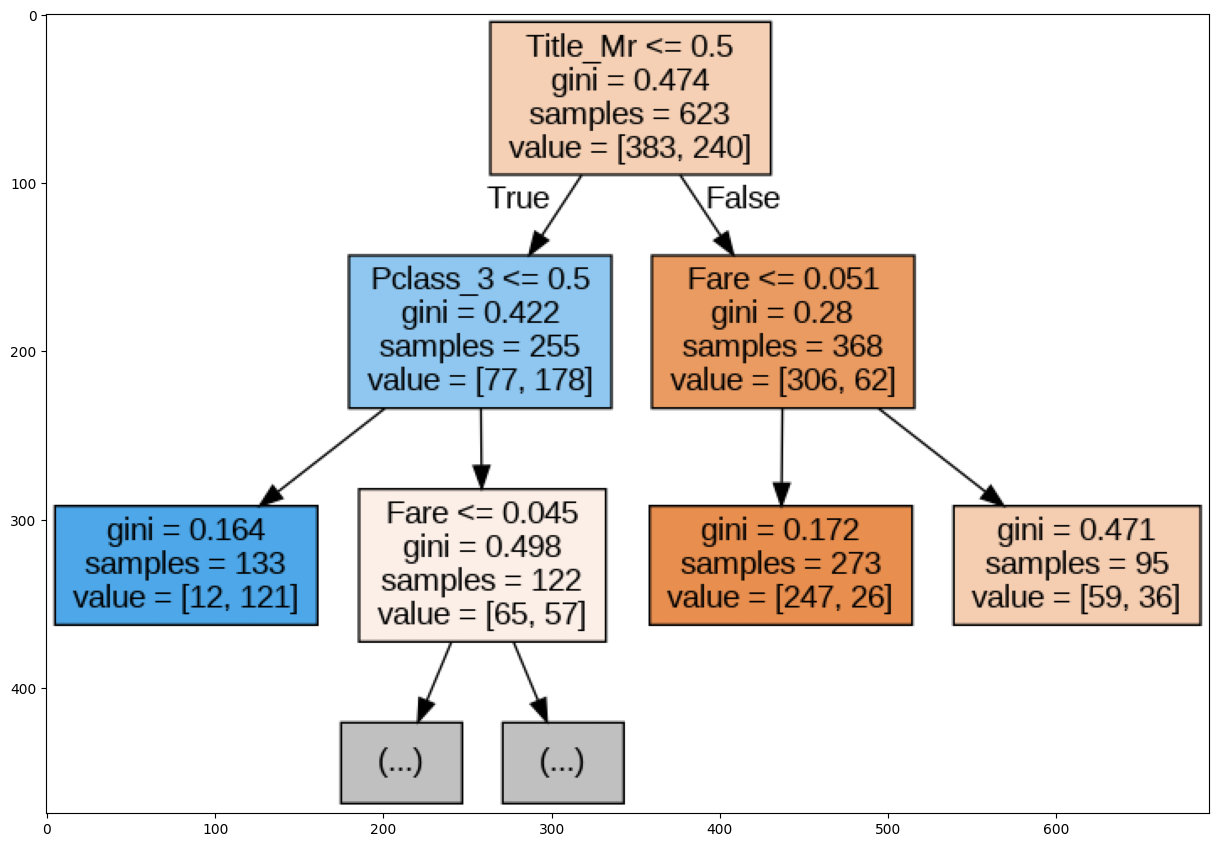

In [131]:
best_decision_tree = tree.export_graphviz(best_ccp_alpha_tree, out_file='best_tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng best_tree.dot -o best_tree.png # to convert the file
image = plt.imread('best_tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

In [132]:
print(best_ccp_alpha_tree.score(X_train,y_train))
print(best_ccp_alpha_tree.score(X_test,y_test))

0.8234349919743178
0.8171641791044776


## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024